In [1]:
#colab cell
#from google.colab import drive
#drive.mount('/content/drive')
#!unzip /content/drive/MyDrive/Colab\ Notebooks/Phase2.zip
!ls

DataSet2  drive  Labels.xlsx  sample_data


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Load image file paths and corresponding noise labels from labels.xlsx
labels_df = pd.read_excel('Labels.xlsx', names=['Original_Path', 'Noise_Type', 'Noisy_Path'])
target_size = 312

In [4]:
# Preprocess the data
image_paths = labels_df['Noisy_Path'].tolist()
noise_labels = labels_df['Noise_Type'].tolist()
print(image_paths[0])


With-Noise/cast_def_0_0.jpeg


In [5]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(image_paths, noise_labels, test_size=0.1, random_state=42)
# Map string labels to numerical values
label_mapping = {'Gaussian': 0, 'Salt': 1, 'Periodic': 2}

# Convert string labels to numerical labels
y_train_numerical = [label_mapping[label] for label in y_train]
y_val_numerical = [label_mapping[label] for label in y_val]
print(y_train[0])
print(X_train[0])


Gaussian
With-Noise/cast_def_0_588.jpeg


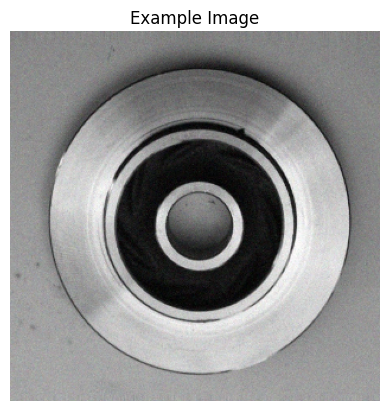

In [6]:
# Define a function to load and preprocess images
def load_and_preprocess_image(image_path):
    dataset_path = '/content/DataSet2/' + image_path
    img = cv2.imread(dataset_path)
    img = cv2.resize(img, (target_size, target_size))  # Resize the image to the desired input shape
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    return img
# Load and preprocess images
X_train_processed = np.array([load_and_preprocess_image(path) for path in X_train])
X_val_processed = np.array([load_and_preprocess_image(path) for path in X_val])

plt.imshow(X_train_processed[0])
plt.title("Example Image")
plt.axis('off')  # Turn off axis labels
plt.show()


In [7]:
# Define the noise classifier model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the noise classifier model
model.fit(X_train_processed, np.array(y_train_numerical), epochs=32, validation_data=(X_val_processed, np.array(y_val_numerical)))


Epoch 1/32
36/36 [==============================] - 20s 246ms/step - loss: 0.7080 - accuracy: 0.6800 - val_loss: 0.1485 - val_accuracy: 0.9440
Epoch 2/32
36/36 [==============================] - 4s 108ms/step - loss: 0.1842 - accuracy: 0.9369 - val_loss: 0.0243 - val_accuracy: 0.9840
Epoch 3/32
36/36 [==============================] - 4s 112ms/step - loss: 0.0387 - accuracy: 0.9858 - val_loss: 0.1492 - val_accuracy: 0.9760
Epoch 4/32
36/36 [==============================] - 4s 115ms/step - loss: 0.0382 - accuracy: 0.9902 - val_loss: 0.0274 - val_accuracy: 0.9920
Epoch 5/32
36/36 [==============================] - 4s 112ms/step - loss: 0.0180 - accuracy: 0.9964 - val_loss: 8.3085e-04 - val_accuracy: 1.0000
Epoch 6/32
36/36 [==============================] - 4s 114ms/step - loss: 0.0311 - accuracy: 0.9884 - val_loss: 0.1190 - val_accuracy: 0.9520
Epoch 7/32
36/36 [==============================] - 4s 119ms/step - loss: 0.1121 - accuracy: 0.9689 - val_loss: 0.0850 - val_accuracy: 0.9680
E

In [10]:
# Evaluate the noise classifier model
y_pred = model.predict(X_val_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_val_numerical, y_pred_classes)
conf_matrix = confusion_matrix(y_val_numerical, y_pred_classes)
classification_rep = classification_report(y_val_numerical, y_pred_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

4/4 [==============================] - 0s 32ms/step
Accuracy: 0.96
Confusion Matrix:
 [[38  0  0]
 [ 0 46  0]
 [ 5  0 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      1.00      1.00        46
           2       1.00      0.88      0.94        41

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

